In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Or, ignore only specific categories
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
#Import          relevant          packages
import numpy                          as np
import pandas                         as pd
from sklearn                    import tree
import matplotlib.pyplot             as plt
import matplotlib                    as mpl
from matplotlib.ticker import FuncFormatter
mpl.rcParams['mathtext.fontset']   = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [3]:
# Importing the main file and calculating the rate of SOC change in the available studies
main_file                   =                                 pd.read_excel('Supporting Dataset.xlsx')
main_file_pos               =                                        main_file[main_file['∆SOC'] >= 0]
main_file_neg               =                                        main_file[main_file['∆SOC']  < 0]
main_file['∆SOCSign']       =                     main_file['∆SOC'].apply(lambda x: 1 if x < 0 else 0)
main_file['∆SOCrate']       =                        main_file['∆SOC'] / main_file['Duration (years)']
main_file['∆SOCpercentage'] =   (100 * main_file['∆SOC'] )/ main_file['SOC stock-CT (0-30cm, MgC/ha)']

# Removing nan entries, and groupig based on the SOC_CT threshold as well as the SOC changes
df                          =          main_file.dropna()
df_pos                      =         df[df['∆SOC'] >= 0]
df_neg                      =         df[df['∆SOC']  < 0]
df_socg50 =  df[df['SOC stock-CT (0-30cm, MgC/ha)'] > 50]
df_socl50 =  df[df['SOC stock-CT (0-30cm, MgC/ha)'] <=50]
df.iloc[:,:]

,Author,Year,Country,Site,Longitude,Latitude,MAT (Celsius),MAP (mm/yr),PET (mm/yr),AI (-),...,Initial Year,Duration (years),Final Year,Maximum depth (cm),"SOC stock-CT (0-30cm, MgC/ha)","SOC stock-NT (0-30cm, MgC/ha)",∆SOC,∆SOCSign,∆SOCrate,∆SOCpercentage
0,Abreu,2011,U.S.,"Altus, Oklahoma",-99.33,34.64,15.0,741,1623.96,2.191579,...,2002,8,2010,110,37.9,38.3,0.35,0,0.043750,0.923483
1,Abreu,2011,U.S.,"Altus, Oklahoma",-99.33,34.64,15.0,741,1623.96,2.191579,...,2002,8,2010,110,38.9,39.4,0.50,0,0.062500,1.285347
2,Abreu,2011,U.S.,"Altus, Oklahoma",-99.33,34.64,15.0,741,1623.96,2.191579,...,2002,8,2010,110,39.3,44.0,4.76,0,0.595000,12.111959
3,Abreu,2011,U.S.,"Altus, Oklahoma",-99.33,34.64,15.0,741,1623.96,2.191579,...,2002,8,2010,110,39.2,38.9,-0.24,1,-0.030000,-0.612245
4,Abreu,2011,U.S.,"Altus, Oklahoma",-99.33,34.64,15.0,741,1623.96,2.191579,...,2002,8,2010,110,37.1,44.1,7.00,0,0.875000,18.867925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Zhang et al.,2009,China,"Zhangwu, Liaoning",122.33,42.53,7.2,510,970.20,1.902353,...,2002,6,2008,100,40.2,49.7,9.53,0,1.588333,23.706468
146,Zhang et al.,2018,China,Jilin,125.60,44.20,4.4,520,845.76,1.626462,...,2001,12,2013,30,66.2,67.0,0.84,0,0.070000,1.268882
147,Zhang et al.,2018,China,Jilin,125.60,44.20,4.4,520,845.76,1.626462,...,2001,12,2013,30,68.1,73.4,5.29,0,0.440833,7.767988
148,Zibilske et al.,2002,U.S.,"Weslaco, Texas",-97.95,26.15,23.1,603,1617.36,2.682189,...,1992,9,2001,30,44.9,46.8,1.84,0,0.204444,4.097996


In [4]:
# Bin the data based on SOC_CT values
bins             =                                      [0, 25, 50, 75, 120]
df['Binned_SOC'] = pd.cut(df['SOC stock-CT (0-30cm, MgC/ha)'], bins = bins,\
                                labels=['0-25', '25-50', '50-75', '75-120'])

# Flag based on the sign of ∆SOC of the study
flag_0_counts    =      df[df['∆SOCSign'] == 0].groupby('Binned_SOC').size()
flag_1_counts    =      df[df['∆SOCSign'] == 1].groupby('Binned_SOC').size()

# Get the the percentage of negative ∆SOC studies for each bin
bin_counts      =                df['Binned_SOC'].value_counts().sort_index()
print(                                      100 * flag_1_counts / bin_counts)

Binned_SOC
0-25       0.000000
25-50     11.250000
50-75     32.352941
75-120    59.090909
dtype: float64


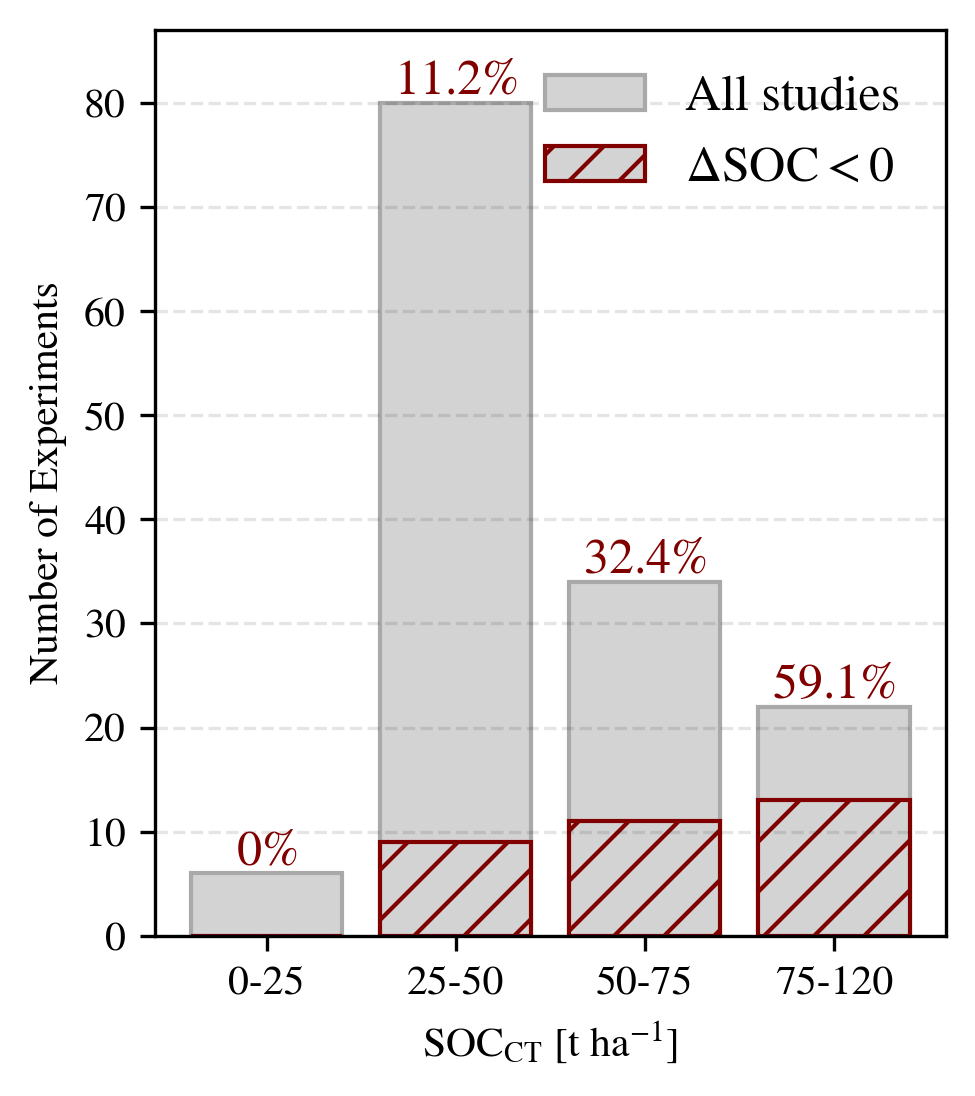

In [5]:
fig = plt.figure(figsize = (3.4, 4), dpi = 300)
fs  =                                        12
ax  =                          plt.subplot(111)
plt.bar(flag_0_counts.index, flag_0_counts.values + flag_1_counts.values, facecolor = 'lightgrey', edgecolor = 'darkgray',                      label  = r'All studies')
plt.bar(flag_1_counts.index,                        flag_1_counts.values, facecolor = 'lightgrey', edgecolor =   'maroon', hatch = '//', label  = r'$\rm \Delta SOC<0$')

plt.text(0,  8,  r'$  0\%$', fontsize=fs, color = 'maroon', ha='center', va='center')
plt.text(1, 82, r'$11.2\%$', fontsize=fs, color = 'maroon', ha='center', va='center')
plt.text(2, 36, r'$32.4\%$', fontsize=fs, color = 'maroon', ha='center', va='center')
plt.text(3, 24, r'$59.1\%$', fontsize=fs, color = 'maroon', ha='center', va='center')

plt.legend(frameon = False, fontsize = 12, loc =  'upper right')
plt.grid(axis = 'y', linestyle = '--', color = 'k', alpha = 0.1)
plt.ylabel(                            r'Number of Experiments')
plt.xlabel(                   r'$\rm SOC_{CT}$ [t ha${}^{-1}$]')
plt.ylim(                                                 0, 87)
plt.show()

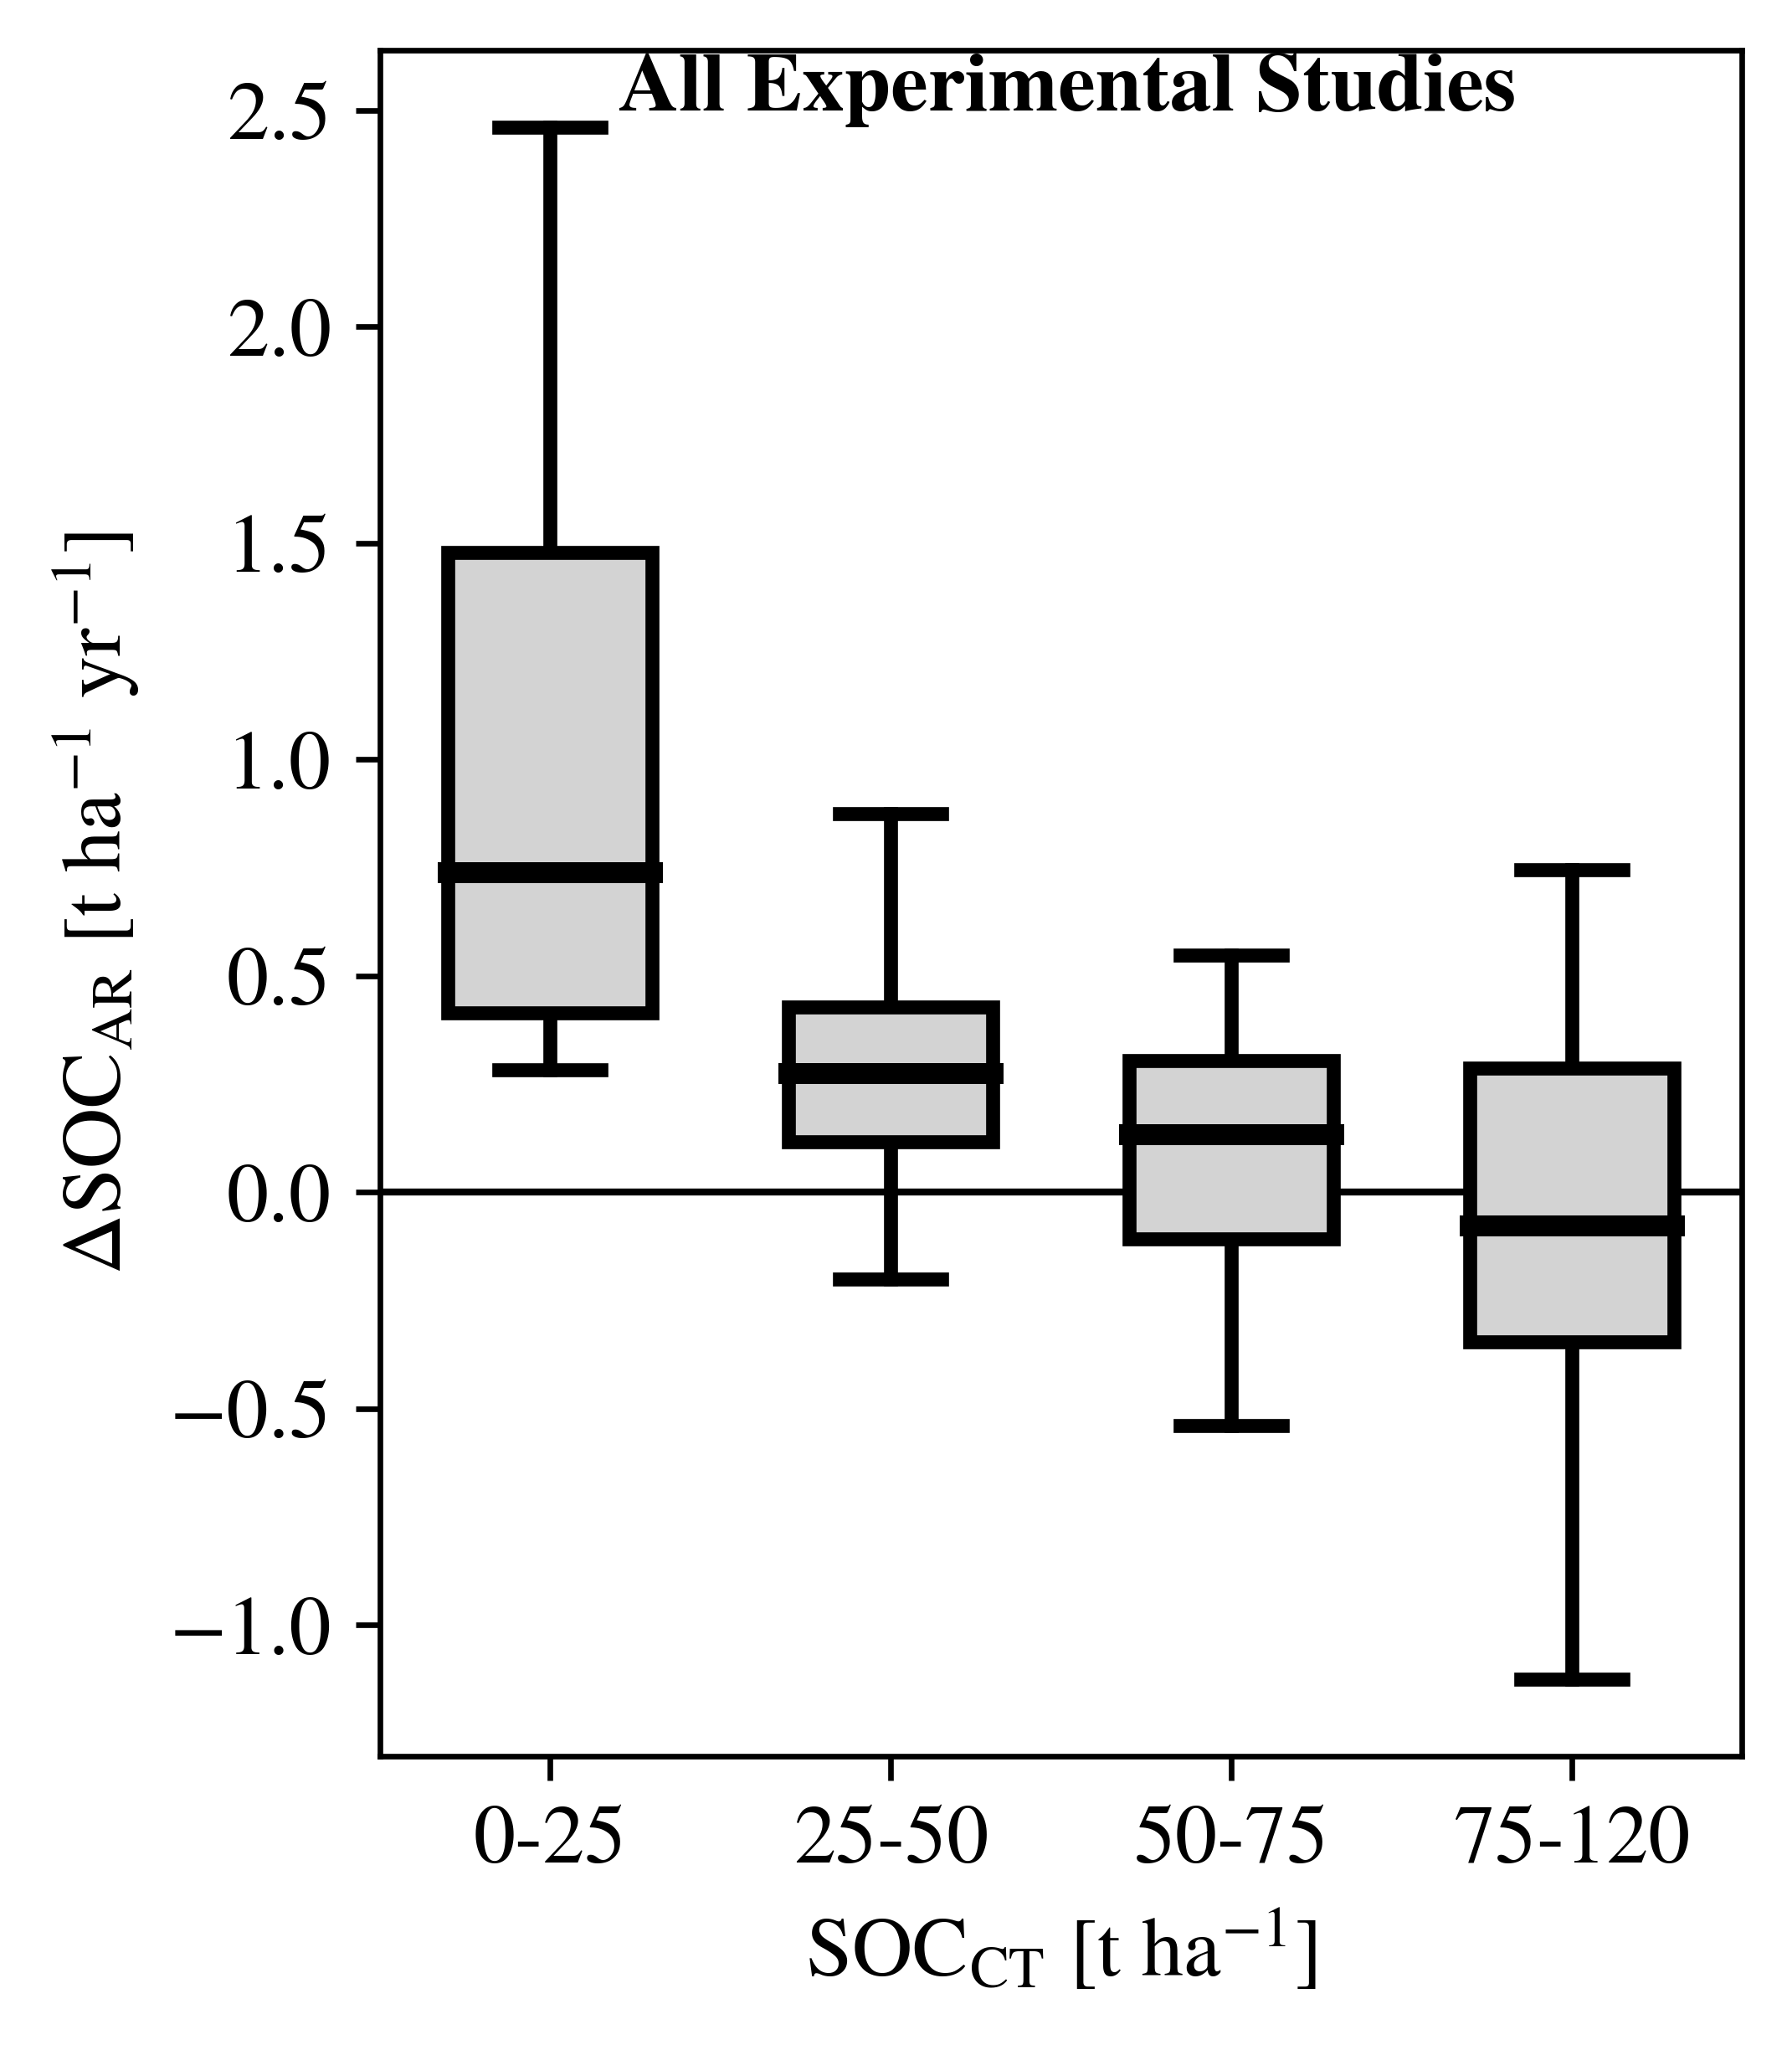

Bin: 0-25, Min: 0.2833333333333333, Q1: 0.4151190476190476, Median: 0.7396666666666667, Q3: 1.4782857142857142, Max: 2.46
Bin: 25-50, Min: -0.19999999999999998, Q1: 0.11582142857142856, Median: 0.2758552631578947, Q3: 0.42878787878787883, Max: 0.875
Bin: 50-75, Min: -0.53875, Q1: -0.10820367132867133, Median: 0.1340625, Q3: 0.30513636363636365, Max: 0.5477777777777777
Bin: 75-120, Min: -1.1243478260869566, Q1: -0.34625, Median: -0.07653846153846154, Q3: 0.2868421052631579, Max: 0.746


In [6]:
# Get the counts in each bin
bin_counts = df['Binned_SOC'].value_counts().sort_index()

# Setting up the figure
fig, ax = plt.subplots(figsize   =   (3.5, 4.5),  dpi  =  600)
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)

# Create a second y-axis for the bar plot
boxplot_dict = ax.boxplot([df[df['Binned_SOC'] == bin_label]['∆SOCrate'] for bin_label in ['0-25', '25-50', '50-75', '75-120']],
    labels       = ['0-25', '25-50', '50-75', '75-120'], widths = 0.6, showfliers = False, patch_artist = True,  
    boxprops     = {'color': 'k', 'linewidth': 2, 'facecolor': '#89CD66'}, 
    medianprops  = {'color': 'k', 'linewidth': 3},
    whiskerprops = {'color': 'k', 'linewidth': 2},
    capprops     = {'color': 'k', 'linewidth': 2}) 

# Colors for each boxplot
colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']

# Update each box's facecolor
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel(                   r'$\rm SOC_{CT}$ [t ha${}^{-1}$]',              fontsize = fs)
ax.set_ylabel(r'$\rm \Delta SOC_{AR}$ [t ha${}^{-1}$ yr${}^{-1}$]',              fontsize = fs)
ax.axhline(                                             y = 0, color = 'k', lw = 1, zorder = 1)
plt.text(1.2 , 2.5, r'All Experimental Studies', fontweight='bold', fontsize= fs, color  = 'k')
plt.show()

# Extract and print median, Q1, Q3, IQR, min, and max values for each bin
for i, bin_label in enumerate(['0-25', '25-50', '50-75', '75-120']):
    path    =   boxplot_dict['boxes'][i].get_path().vertices
    Q1      =                                     path[0][1]
    Q3      =                                     path[2][1]
    median  =      boxplot_dict['medians'][i].get_ydata()[0]
    min_val =     boxplot_dict['caps'][2 * i].get_ydata()[0]
    max_val = boxplot_dict['caps'][2 * i + 1].get_ydata()[0]

    print(f"Bin: {bin_label}, Min: {min_val}, Q1: {Q1}, Median: {median}, Q3: {Q3}, Max: {max_val}")

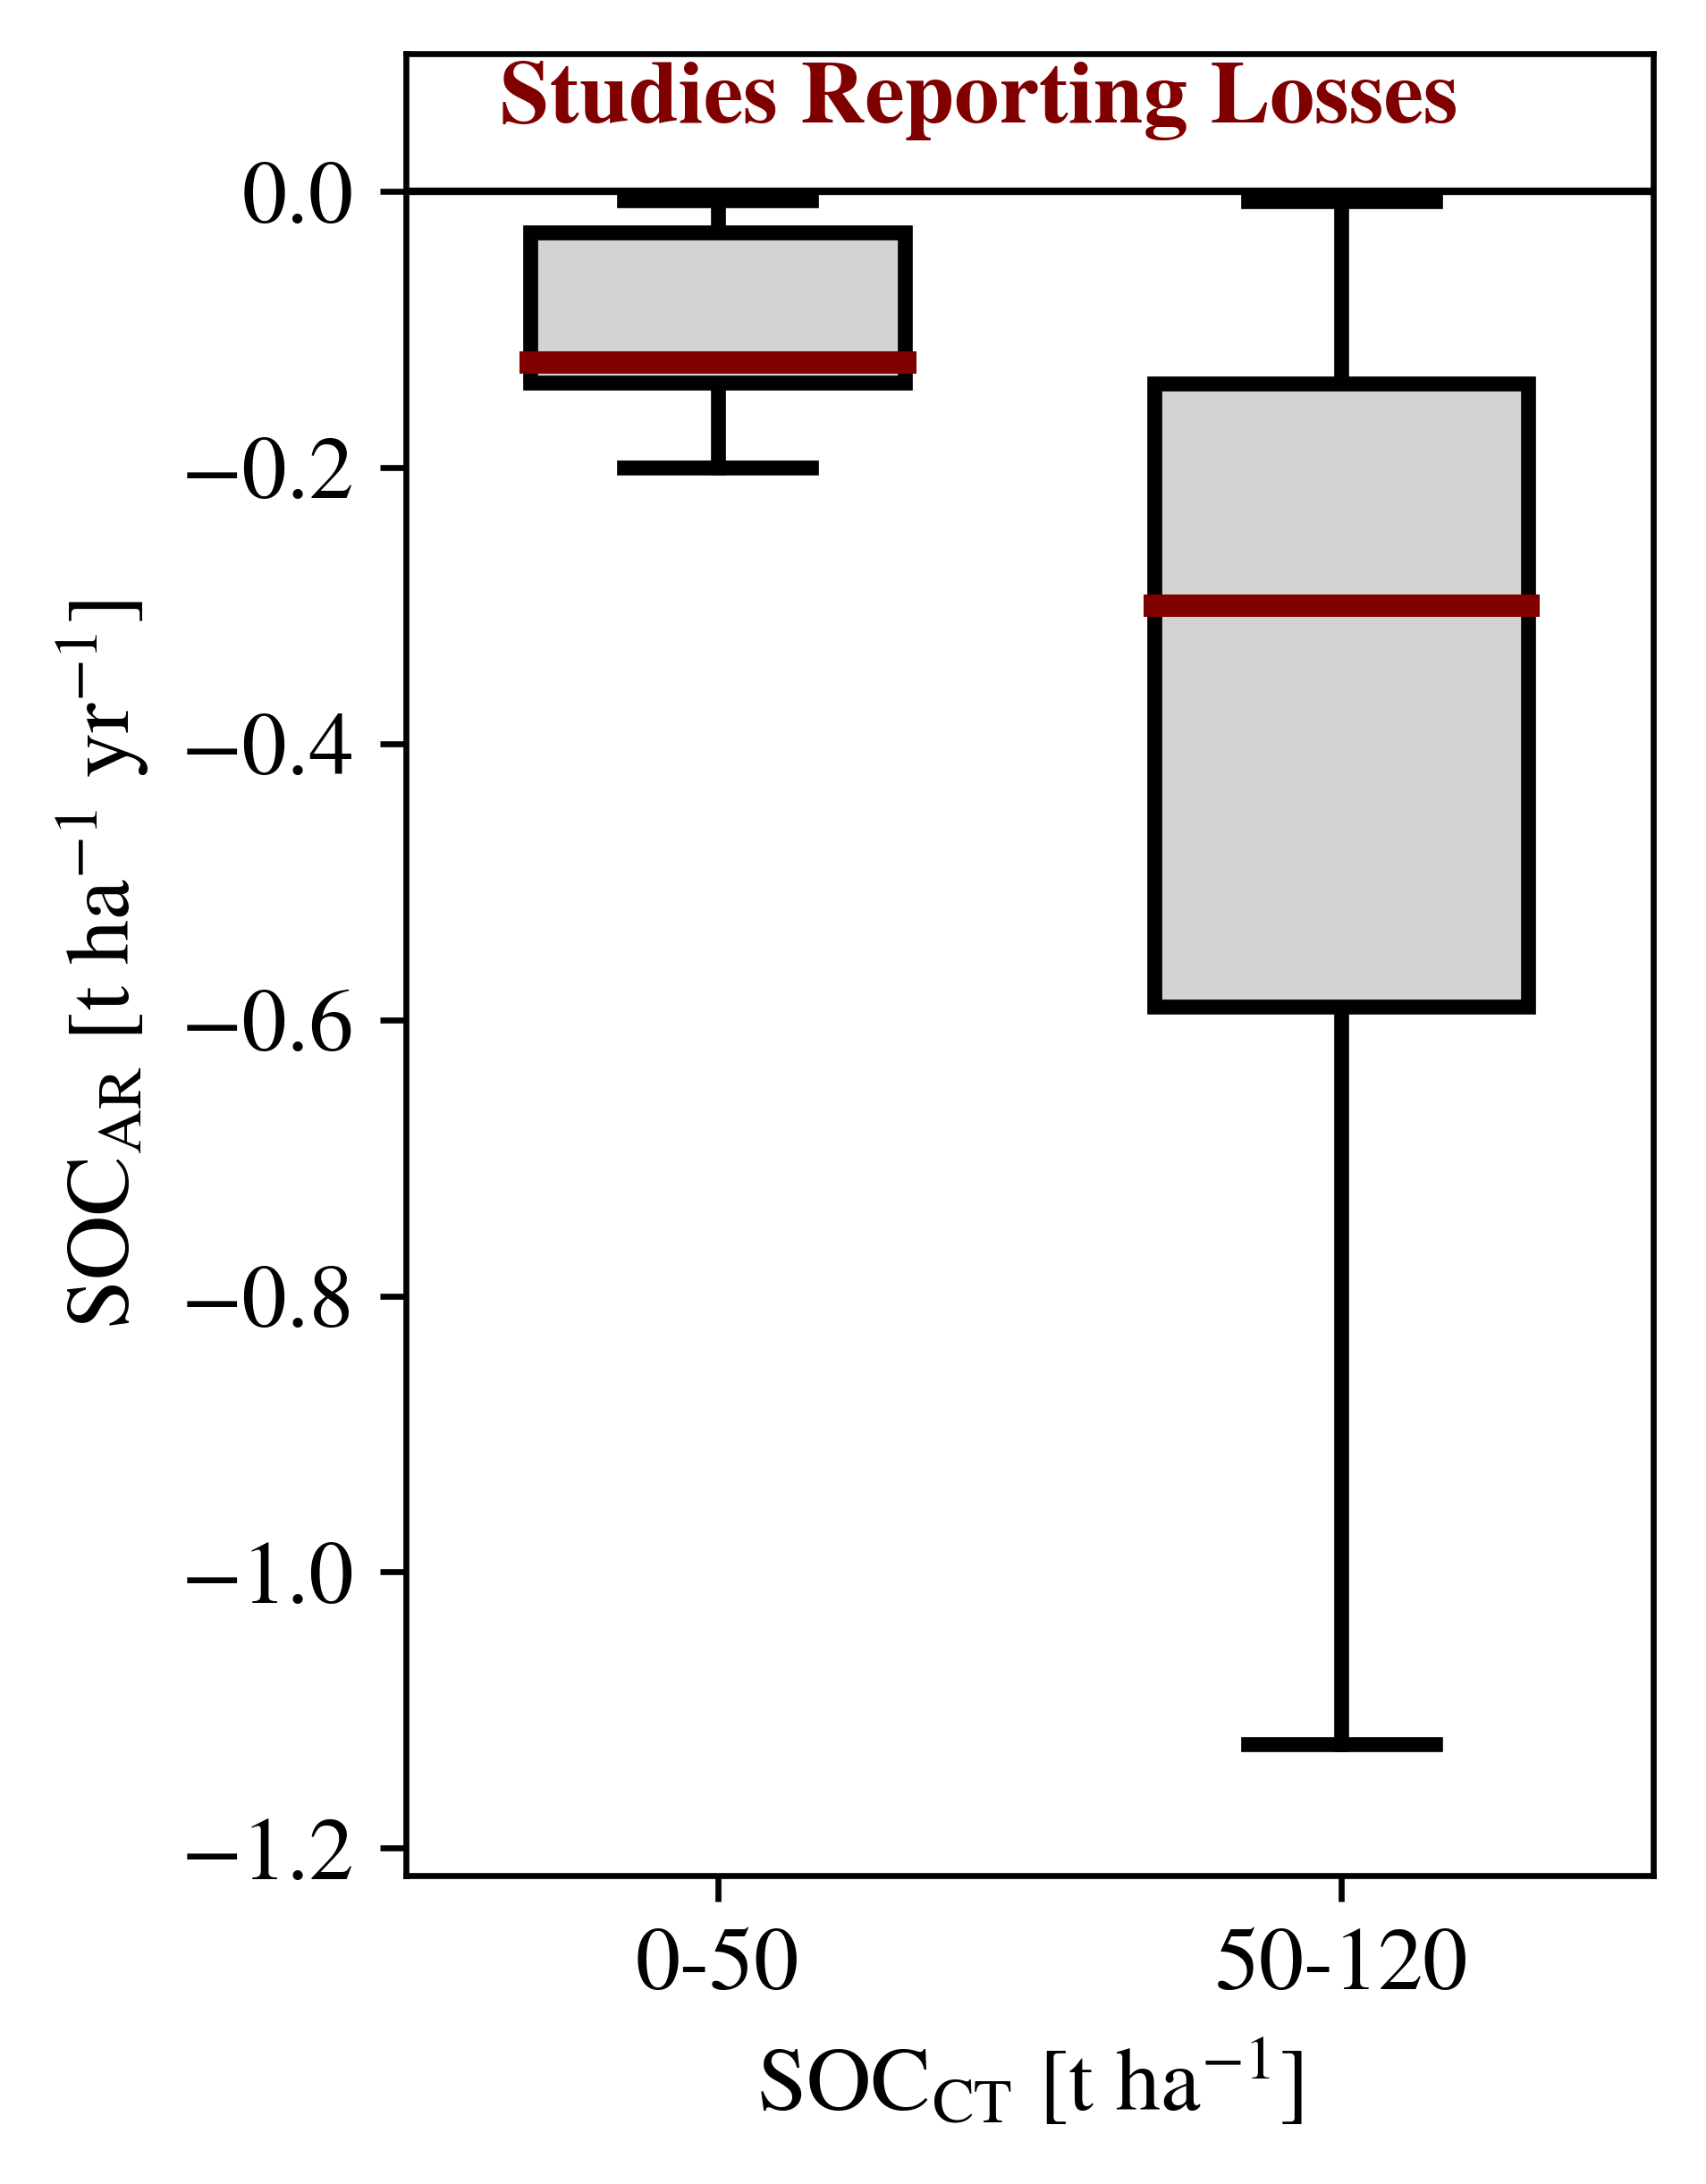

Bin: 0-50, Min: -0.19999999999999998, Q1: -0.13857142857142857, Median: -0.12333333333333334, Q3: -0.03, Max: -0.006551724137931035
Bin: 50-120, Min: -1.1243478260869566, Q1: -0.5905625, Median: -0.3, Q3: -0.1393561872909699, Max: -0.00723404255319149


In [7]:
bins                 =                                                                          [0, 50, 120]
df_neg['Binned_SOC'] = pd.cut(df_neg['SOC stock-CT (0-30cm, MgC/ha)'], bins=bins, labels=['0-50', '50-120'])
flag_0_counts        =                          df_neg[df_neg['∆SOCSign'] == 0].groupby('Binned_SOC').size()
flag_1_counts        =                          df_neg[df_neg['∆SOCSign'] == 1].groupby('Binned_SOC').size()

# Plotting
fig, ax = plt.subplots(figsize = (3, 4.5),          dpi = 600)
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)

boxplot_dict = ax.boxplot([df_neg[df_neg['Binned_SOC'] == bin_label]['∆SOCrate'] for bin_label in ['0-50', '50-120']],
          labels = ['0-50', '50-120'], showfliers = False, widths = 0.6, patch_artist = True, 
    boxprops     = {'color':      'k', 'linewidth': 2., 'facecolor': '#FFBEE8'}, 
    medianprops  = {'color': 'maroon', 'linewidth': 3},
    whiskerprops = {'color':      'k', 'linewidth': 2.},
    capprops     = {'color':      'k', 'linewidth': 2.}) 

# Colors for each boxplot
colors = ['lightgrey',                                                                      'lightgrey']
ax.set_ylim(                                                                                 -1.22, 0.1)
plt.text( 0.65, 0.05, r'Studies Reporting Losses', fontweight = 'bold', color = 'maroon', fontsize = fs)

# Update each box's facecolor
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel(            r'$\rm SOC_{CT}$ [t ha${}^{-1}$]', fontsize = fs)
ax.set_ylabel(r'$\rm SOC_{AR}$ [t ha${}^{-1}$ yr${}^{-1}$]', fontsize = fs)
ax.axhline(                         y = 0, color = 'k', lw = 1, zorder = 1)
plt.show()

for i, bin_label in enumerate(['0-50', '50-120']):
    path    = boxplot_dict['boxes'][i].get_path().vertices
    Q1      =                                     path[0][1]
    Q3      =                                     path[2][1]
    median  =      boxplot_dict['medians'][i].get_ydata()[0]
    min_val =     boxplot_dict['caps'][2 * i].get_ydata()[0]
    max_val = boxplot_dict['caps'][2 * i + 1].get_ydata()[0]

    print(f"Bin: {bin_label}, Min: {min_val}, Q1: {Q1}, Median: {median}, Q3: {Q3}, Max: {max_val}")

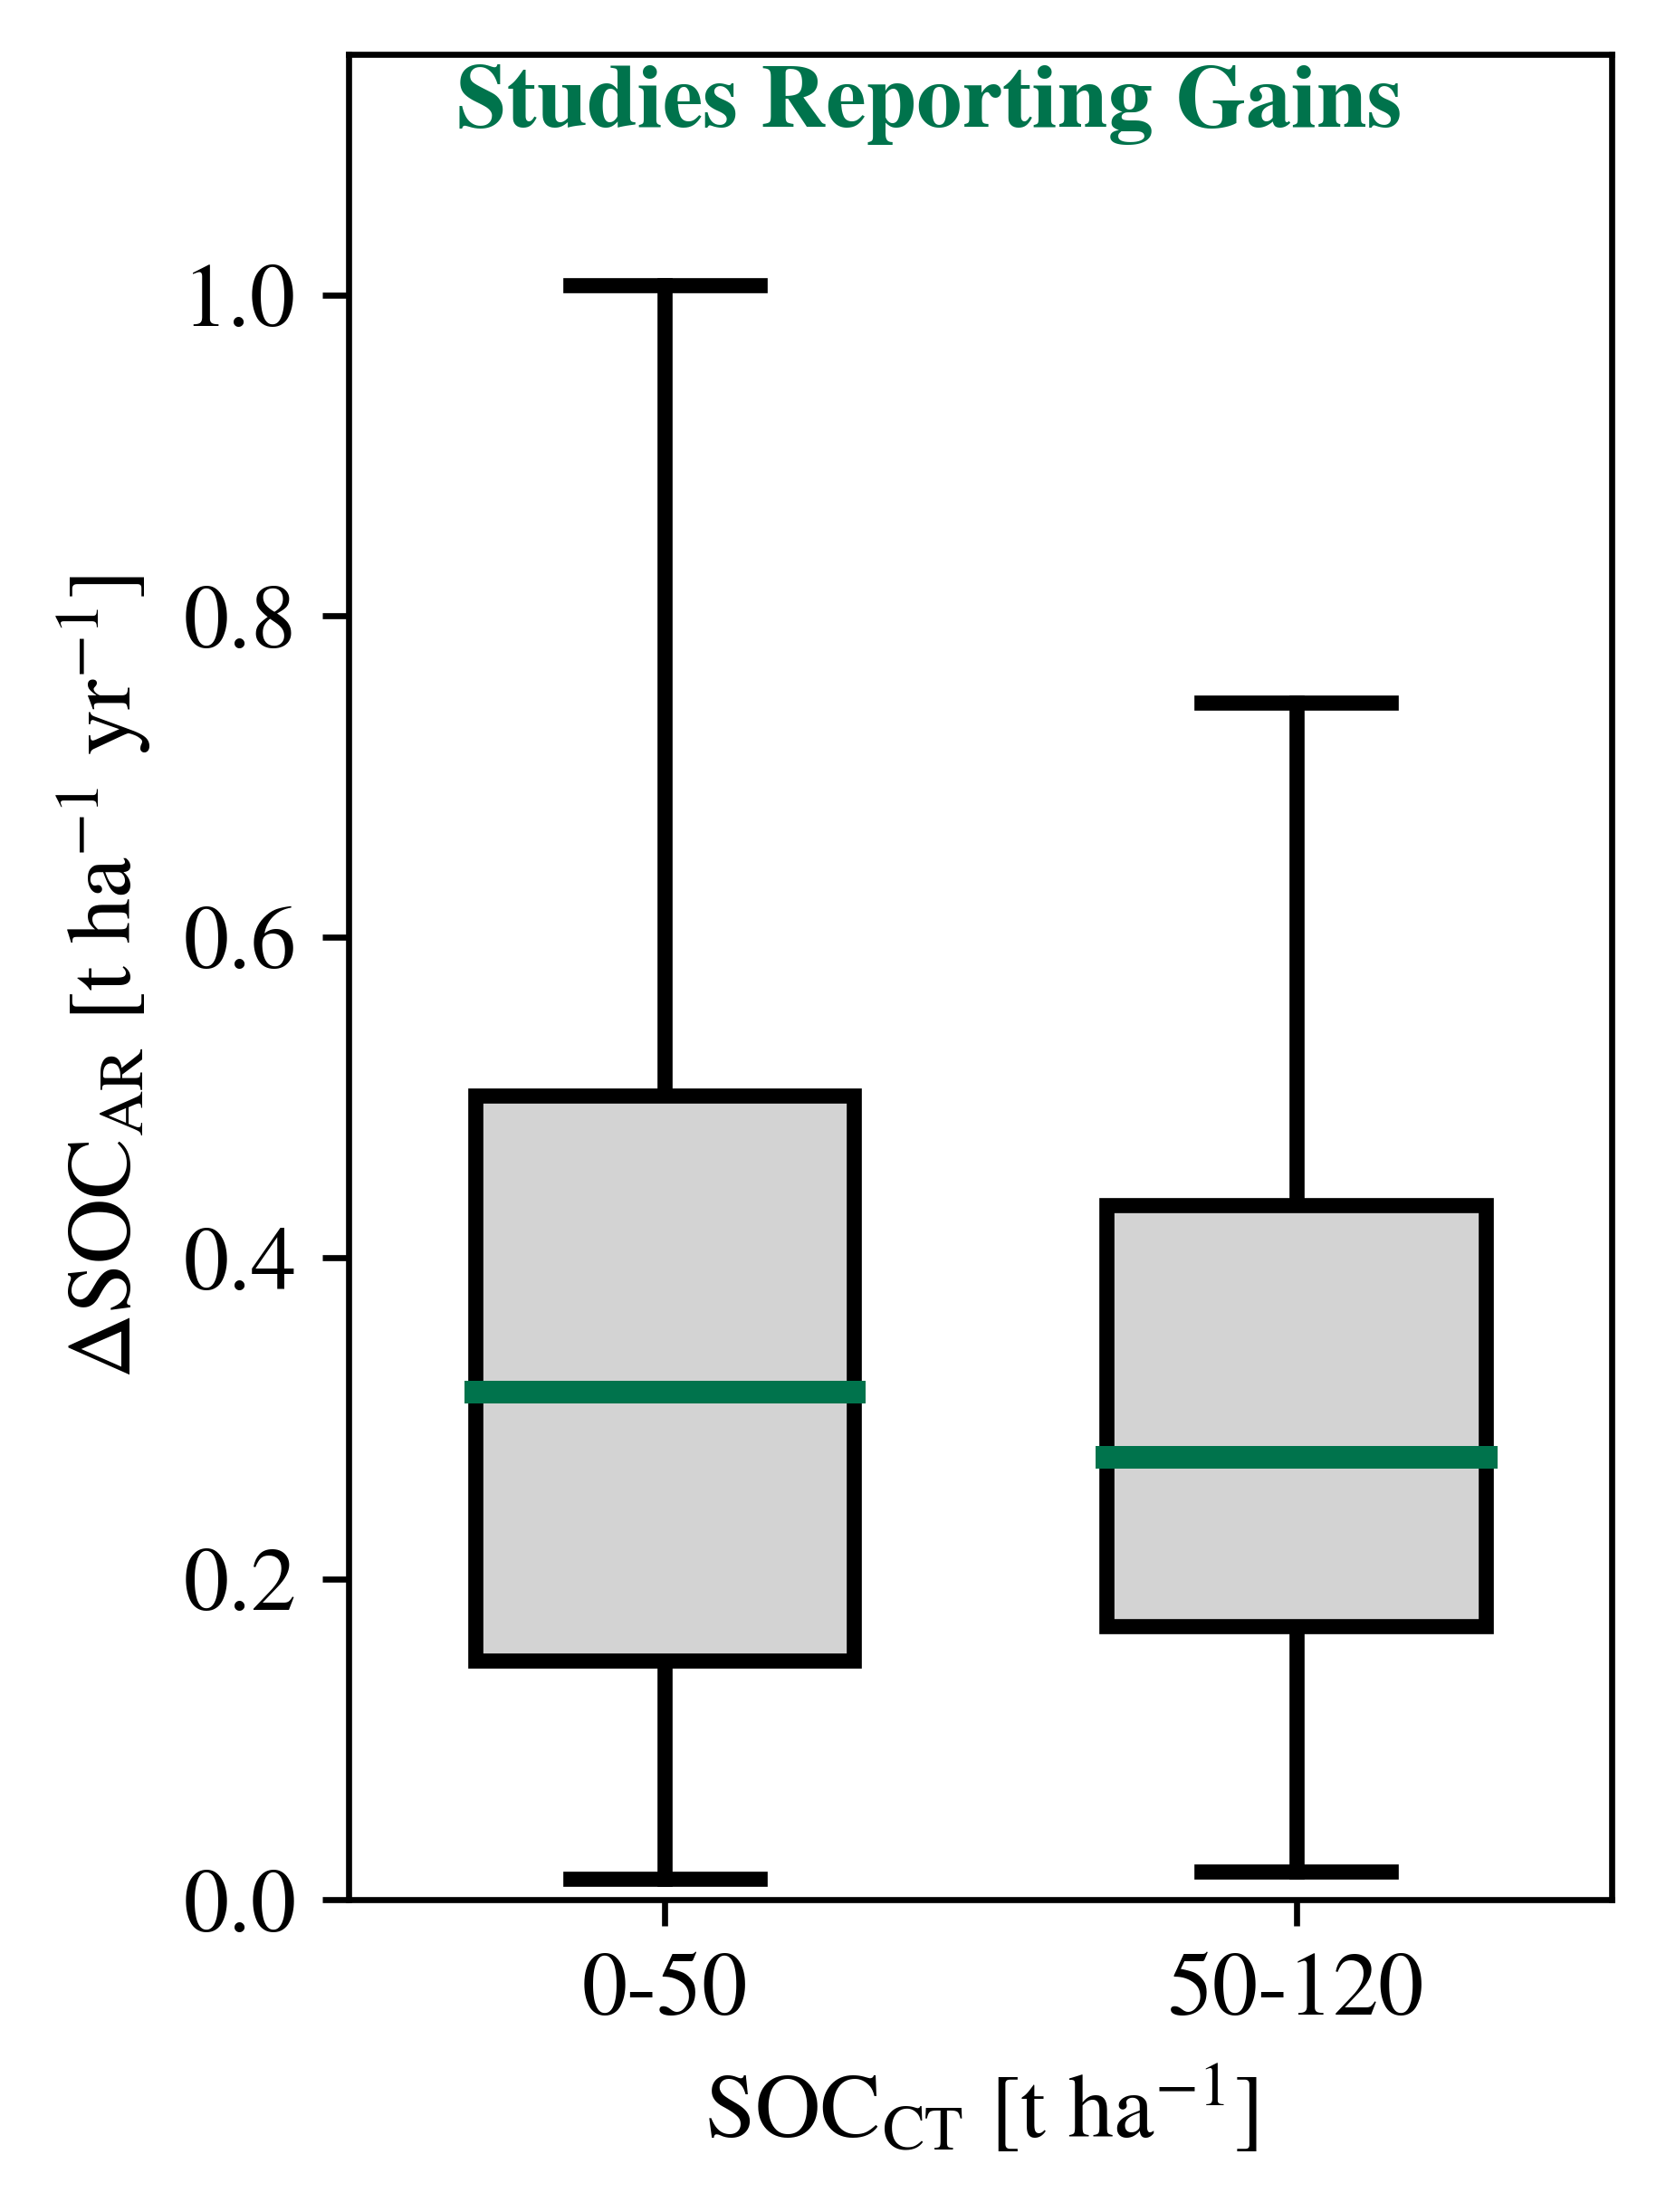

Bin: 0-50, Min: 0.013333333333333334, Q1: 0.1488888888888889, Median: 0.31666666666666665, Q3: 0.50125, Max: 1.006
Bin: 50-120, Min: 0.017872340425531916, Q1: 0.17056034482758622, Median: 0.2762178702570379, Q3: 0.43270833333333336, Max: 0.746


In [8]:
# Bin the data
bins                 =                                                                          [0, 50, 120]
df_pos['Binned_SOC'] = pd.cut(df_pos['SOC stock-CT (0-30cm, MgC/ha)'], bins=bins, labels=['0-50', '50-120'])

flag_0_counts = df_pos[df_pos['∆SOCSign'] == 0].groupby('Binned_SOC').size()
flag_1_counts = df_pos[df_pos['∆SOCSign'] == 1].groupby('Binned_SOC').size()

# Plotting
fig, ax = plt.subplots(figsize = (3, 4.5),          dpi = 600)
ax.tick_params(axis = 'both', which = 'major', labelsize = fs)

boxplot_dict = ax.boxplot([df_pos[df_pos['Binned_SOC'] == bin_label]['∆SOCrate'] for bin_label in ['0-50', '50-120']],
            labels=['0-50', '50-120'], showfliers=False, widths=0.6, patch_artist=True,  
    boxprops     = {'color':       'k', 'linewidth': 2., 'facecolor': '#89CD66'}, 
    medianprops  = {'color': '#00734C', 'linewidth': 3},
    whiskerprops = {'color':       'k', 'linewidth': 2.},
    capprops     = {'color':       'k', 'linewidth': 2.}) 

colors     =  ['lightgrey',                                                                 'lightgrey']
ax.set_ylim(                                                                                    0, 1.15)
plt.text(0.67, 1.105, r'Studies Reporting Gains', fontweight = 'bold', fontsize = fs, color = '#00734c')

# Update each box's facecolor
for patch, color in zip(boxplot_dict['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xlabel(                 r'$\rm {SOC}_{CT}$ [t ha${}^{-1}$]', fontsize = fs)
ax.set_ylabel(r'$\rm \Delta SOC_{AR}$ [t ha${}^{-1}$ yr${}^{-1}$]', fontsize = fs)
plt.show()

for i, bin_label in enumerate(['0-50', '50-120']):
    path    =   boxplot_dict['boxes'][i].get_path().vertices
    Q1      =                                     path[0][1]
    Q3      =                                     path[2][1]
    median  =      boxplot_dict['medians'][i].get_ydata()[0]
    min_val =     boxplot_dict['caps'][2 * i].get_ydata()[0]
    max_val = boxplot_dict['caps'][2 * i + 1].get_ydata()[0]

    print(f"Bin: {bin_label}, Min: {min_val}, Q1: {Q1}, Median: {median}, Q3: {Q3}, Max: {max_val}")

In [9]:
df_ur = df[(df['SOC stock-CT (0-30cm, MgC/ha)'] > 50)  &  (df['AI (-)'] > 1.5)]
df_ul = df[(df['SOC stock-CT (0-30cm, MgC/ha)'] > 50)  &  (df['AI (-)'] < 1.5)]
df_ll = df[(df['SOC stock-CT (0-30cm, MgC/ha)'] <= 50) & (df['AI (-)'] <= 1.5)]
df_lr = df[(df['SOC stock-CT (0-30cm, MgC/ha)'] <= 50) & (df['AI (-)'] >= 1.5)]

print('% of Neg ∆SOC', 100*(df_ur['∆SOCSign'] == 1).sum()/len(df_ur), 100*(df_ul['∆SOCSign'] == 1).sum()/len(df_ul),  100*(df_ll['∆SOCSign'] == 1).sum()/len(df_ll), 100*(df_lr['∆SOCSign'] == 1).sum()/len(df_lr))
print(       'Median',                    df_ur['∆SOCrate'].median(),                    df_ul['∆SOCrate'].median(),                     df_ll['∆SOCrate'].median(),                    df_lr['∆SOCrate'].median())

% of Neg ∆SOC 33.333333333333336 46.34146341463415 9.67741935483871 10.909090909090908
Median 0.129375 0.06206896551724138 0.24333333333333332 0.29333333333333333


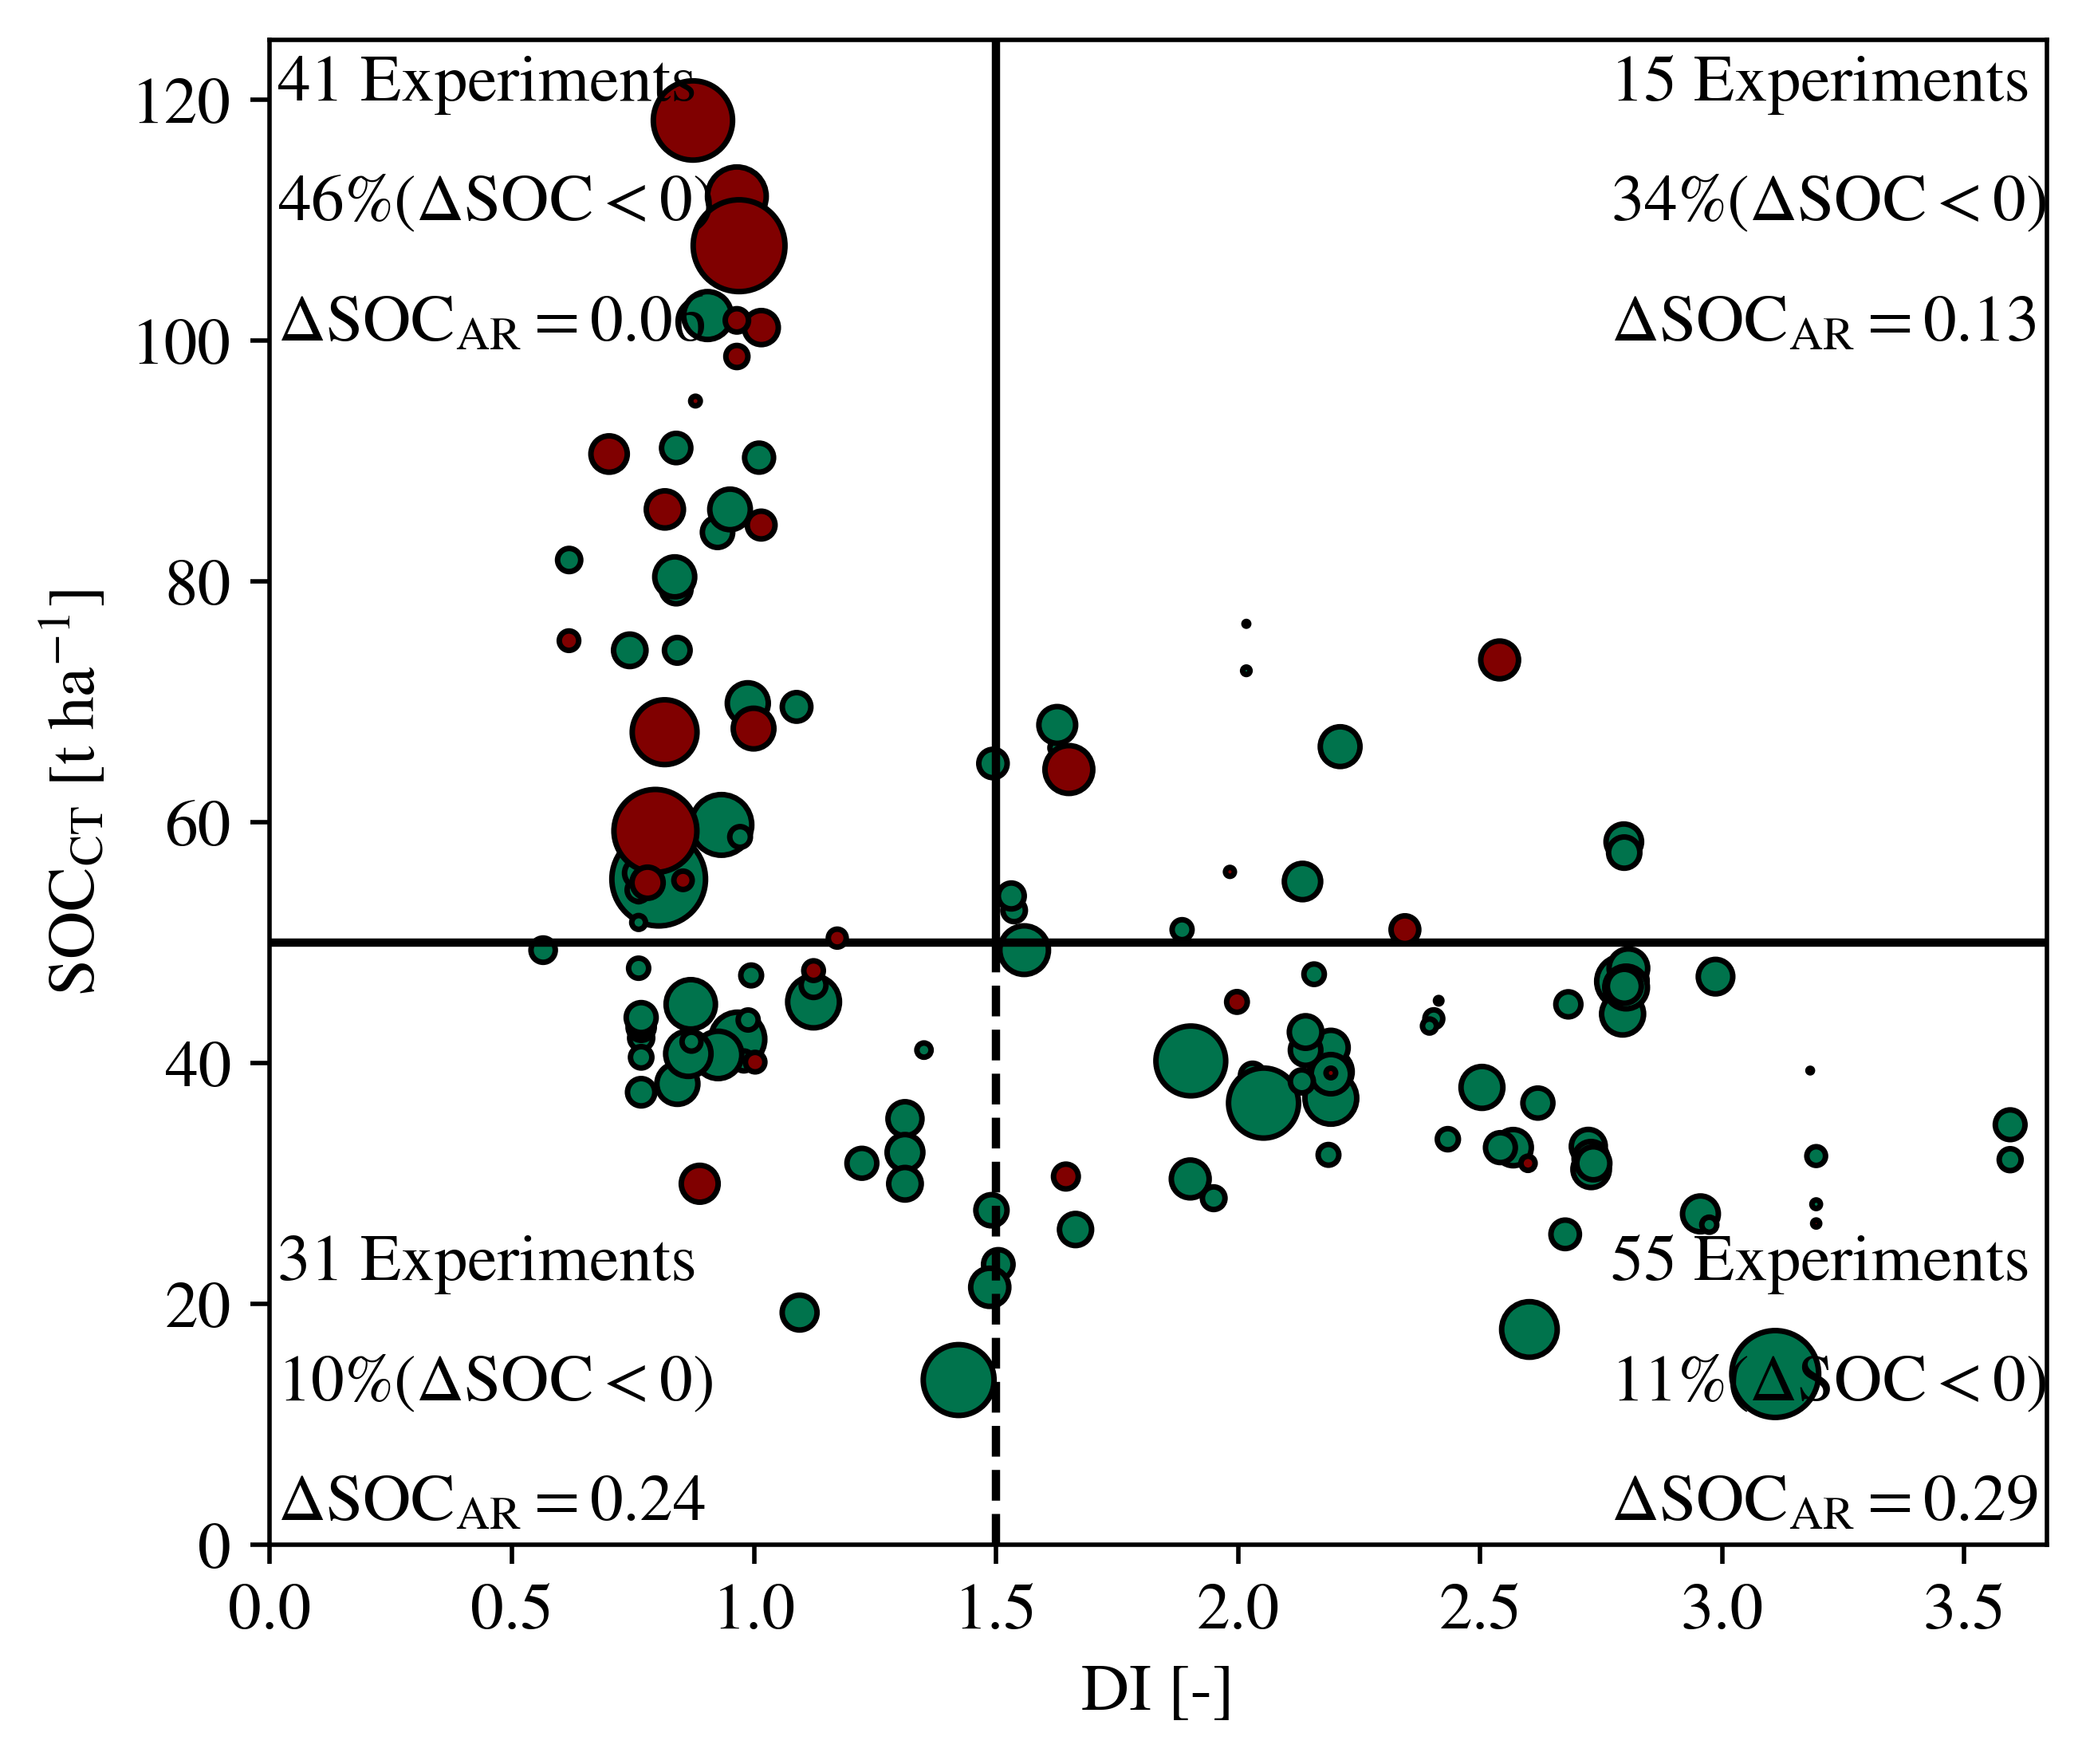

In [10]:
fig           =                    plt.figure(figsize = (5.75, 5),          dpi = 500)
plt.axhline(y =  50,                                 linestyle = 'solid', color = 'k')
plt.axvline(x = 1.5, ymin =       0, ymax = 50/125, linestyle = 'dashed', color = 'k')
plt.axvline(x = 1.5, ymin =  50/125, ymax =      1, linestyle =  'solid', color = 'k')

plt.scatter(df_pos['AI (-)'].values, df_pos['SOC stock-CT (0-30cm, MgC/ha)'].values, s=100* np.abs(df_pos['∆SOCrate'].values), edgecolor = 'k', facecolor='#00734c', alpha=1, label='Positive ΔSOC', zorder = 2)
plt.scatter(df_neg['AI (-)'].values, df_neg['SOC stock-CT (0-30cm, MgC/ha)'].values, s=100* np.abs(df_neg['∆SOCrate'].values), edgecolor = 'k', facecolor= 'maroon', alpha=1, label='Negative ΔSOC', zorder = 3)

plt.text(2.77, 120, r'15 Experiments',                                   fontsize = fs)
plt.text(2.77, 110, r'$\rm 34\% \left(\Delta SOC <0 \right)$',           fontsize = fs)
plt.text(2.77, 100, r'$\rm \Delta SOC_{AR} = 0.13$',  fontweight='bold', fontsize = fs)

plt.text(0.015, 120, r'41 Experiments',                                  fontsize = fs)
plt.text(0.015, 110, r'$\rm 46\% \left(\Delta SOC <0 \right)$',          fontsize = fs)
plt.text(0.015, 100, r'$\rm \Delta SOC_{AR} = 0.06$',  fontweight='bold',fontsize = fs)

plt.text(0.015, 22, r'31 Experiments',                                   fontsize = fs)
plt.text(0.015, 12, r'$\rm 10\% \left(\Delta SOC <0 \right)$',           fontsize = fs)
plt.text(0.015,  2, r'$\rm \Delta SOC_{AR} = 0.24$',  fontweight='bold', fontsize = fs)

plt.text(2.77, 22, r'55 Experiments',                                    fontsize = fs)
plt.text(2.77, 12, r'$\rm 11\% \left(\Delta {SOC} <0 \right)$',          fontsize = fs)
plt.text(2.77,  2, r'$\rm \Delta SOC_{AR} = 0.29$',  fontweight='bold',  fontsize = fs)

plt.xlabel(                        r'DI [-]',                            fontsize = fs)
plt.ylabel(r'$\rm SOC_{CT}$ [t ha${}^{-1}$]',                            fontsize = fs)

plt.xlim(0,         3.67)
plt.ylim(0,          125)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.show()

In [11]:
df_ul_pos =  df_ul[df_ul['∆SOC']  >= 0]
df_ul_neg =  df_ul[df_ul['∆SOC']  <  0]

df_nr = df[(df['SOC stock-CT (0-30cm, MgC/ha)'] > 50) & (df['AI (-)'] < 1.5) & (df['NPP (t/ha/yr)'] >= 5.5)]
df_nl = df[(df['SOC stock-CT (0-30cm, MgC/ha)'] > 50) & (df['AI (-)'] < 1.5) & (df['NPP (t/ha/yr)']  < 5.5)]

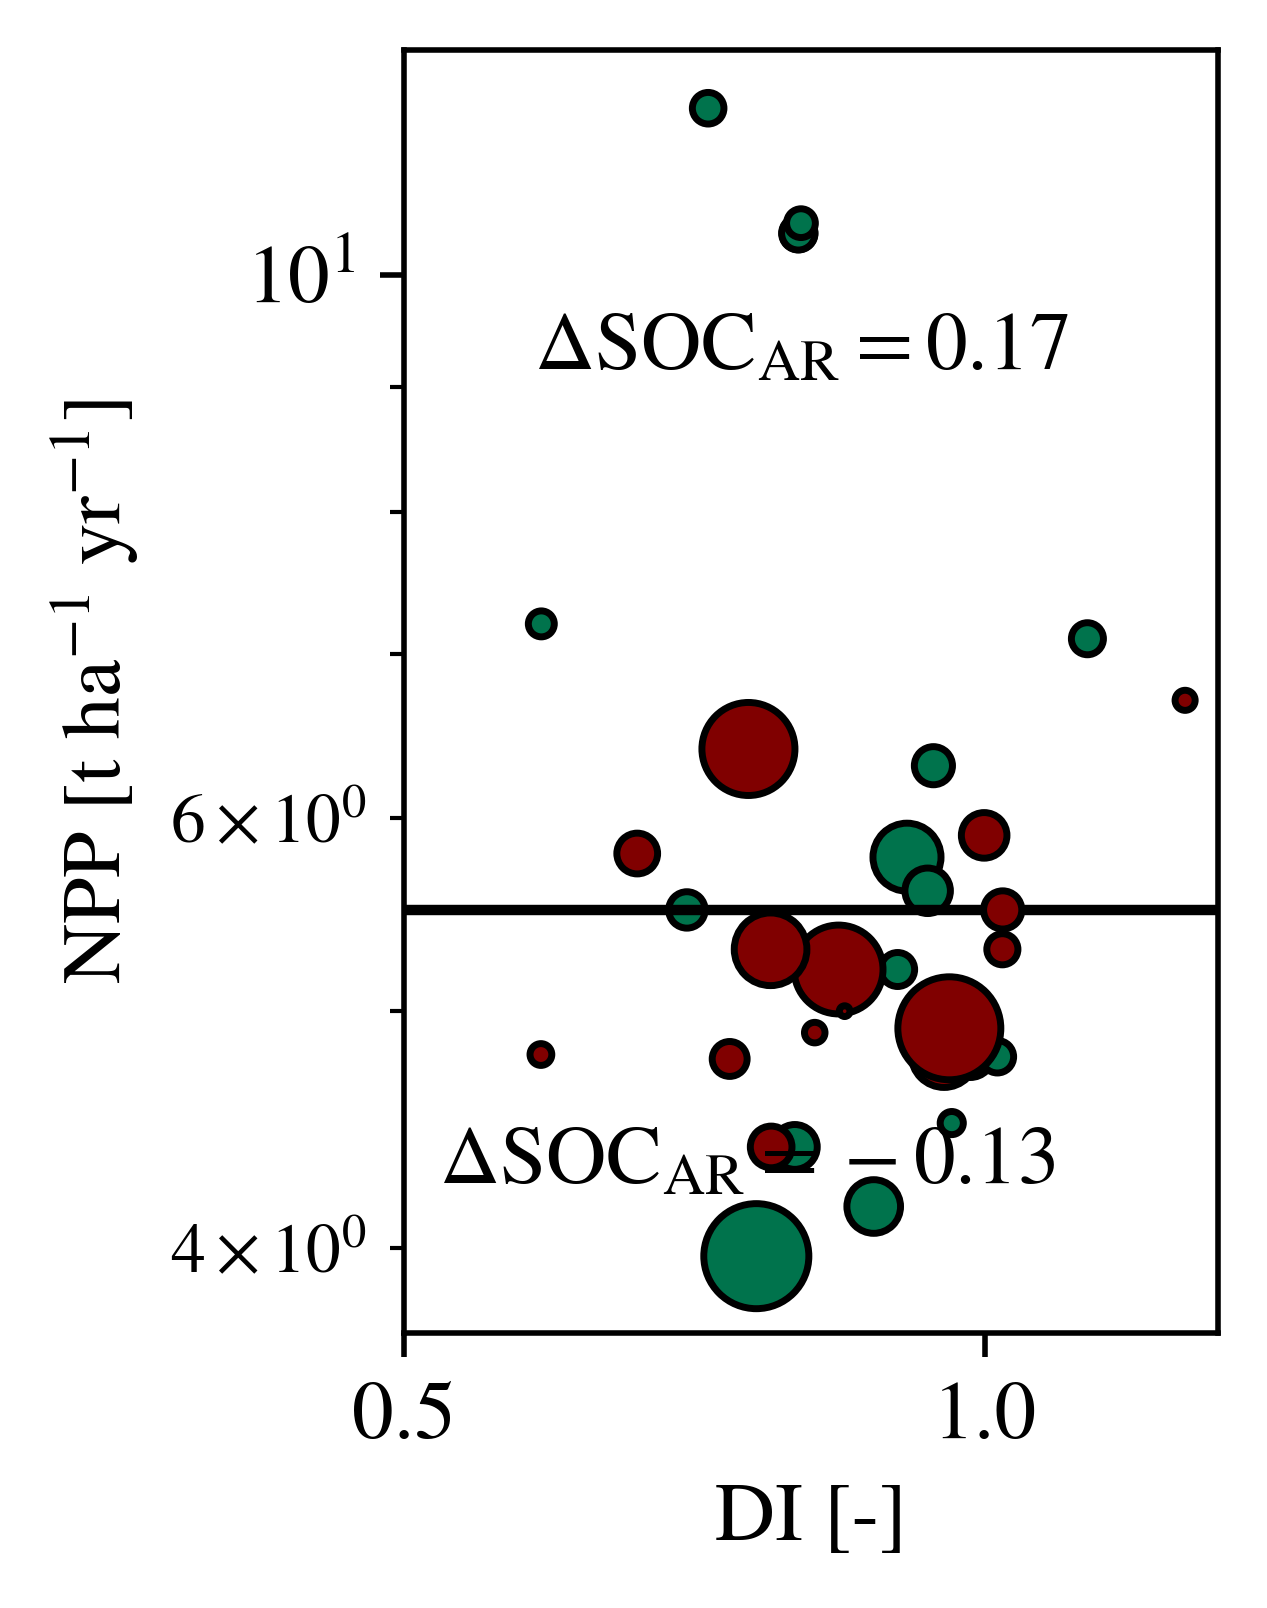

In [12]:
fig  = plt.figure(figsize  =  (2.1, 3.4),   dpi = 500)
plt.axhline(y = 5.5, linestyle = 'solid', color = 'k')

plt.scatter(df_ul_pos['AI (-)'].values, df_ul_pos['NPP (t/ha/yr)'].values, s = 80 * np.abs(df_ul_pos['∆SOCrate'].values), edgecolor = 'k', facecolor='#00734c',zorder =2)
plt.scatter(df_ul_neg['AI (-)'].values, df_ul_neg['NPP (t/ha/yr)'].values, s = 80 * np.abs(df_ul_neg['∆SOCrate'].values), edgecolor = 'k', facecolor= 'maroon',zorder =3)

plt.text(0.530, 4.25, r'$\rm \Delta SOC_{AR} = -0.13$', fontweight='bold', zorder = 5, fontsize = fs)
plt.text(0.612, 9.15, r'$\rm \Delta SOC_{AR} =  0.17$', fontweight='bold', zorder = 5, fontsize = fs)

plt.xlabel(                         r'DI [-]', fontsize = fs)
plt.ylabel(r'NPP [t ha${}^{-1}$ yr${}^{-1}$]', fontsize = fs)

plt.xticks([0.5,     1], fontsize = fs)
plt.yticks([  4, 6, 10], fontsize = fs)

plt.yscale('log')
plt.xlim(0.5,1.2)
plt.show()